# Resnet50+CBAM on  Cifar10 dataset testing


### **Step#1**: Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#############################################
import tensorflow as tf
import keras
#################################
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.models import Model
from keras.layers import Lambda
from keras.datasets import cifar10
#############################################
from models import resnet_v1 
from models.utils import lr_schedule, get_label
print("tensorflow_version",tf.__version__)
print("keras_version",keras.__version__)


tensorflow_version 2.15.0
keras_version 2.15.0


### **Step#2**: load ResNet20+CBAM model and weights

In [2]:

# Load the ResNet-20 model with CBAM layers
resnet50CBAM_model = load_model("saved_models\cifar10_resnet50_cbam_block_model.h5")
resnet50CBAM_model.load_weights("saved_models\cifar10_resnet50_cbam_block_model.h5")
# summarize model.
resnet50CBAM_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 16)           0         ['batch_normalization[0]

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.662991 to fit



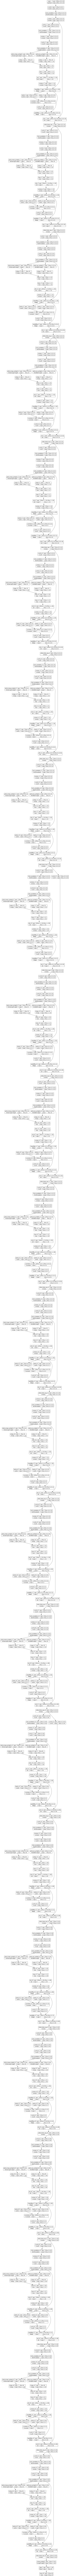

In [3]:
## Ensure the train and test directories exist
#os.makedirs(CNNmodel_dirPath, exist_ok=True)

import pydotplus.graphviz as gv

# Specify the GraphViz executable path
gv.find_graphviz()

# Now try to plot the model
from keras.utils import plot_model
plot_model(resnet50CBAM_model, show_shapes=True)


 ### **Step#3**: Load CIFAR-10 dataset and Split the data into training and testing sets

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### **Step#4**: Visualize the CIFAR-10 dataset

In [5]:
labels_mapping = [ "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

In [6]:
# Create a dictionary that maps each label to its index
label_to_index = {label: index for label,index in enumerate(labels_mapping)}
print(label_to_index)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


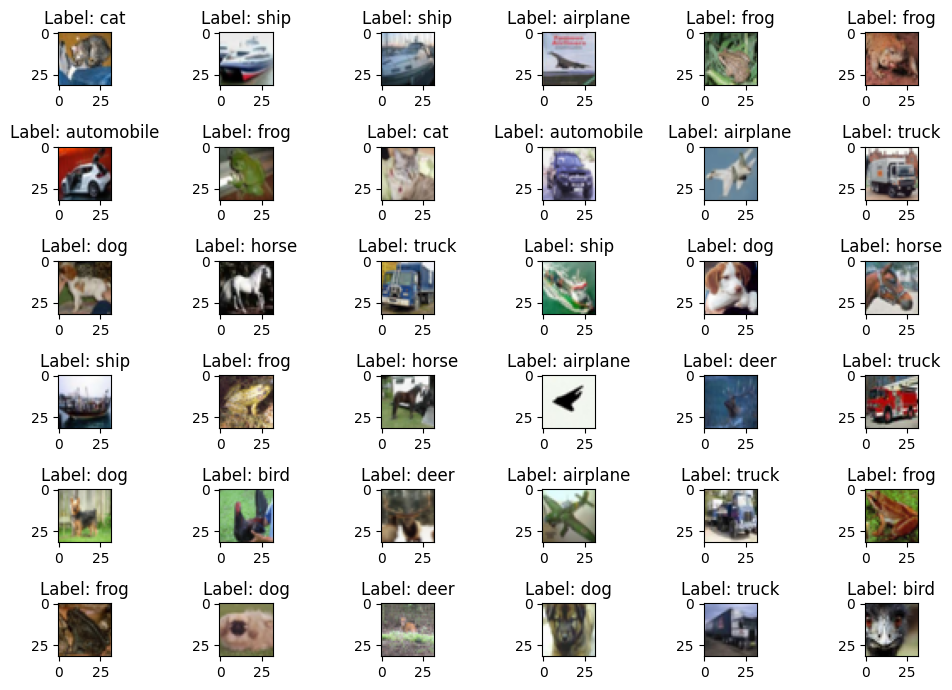

In [7]:
fig, ax = plt.subplots(6, 6, figsize=(10, 7)) 
k = 0
for i in range(6): 
    for j in range(6): 
        ax[i][j].imshow(test_images[k].reshape(32, 32,3))#, aspect='auto') 
        arr = np.array(test_labels[k]).item()
        label_for_index = label_to_index.get(arr, "Index not found")
        ax[i][j].set_title('Label: {}'.format(label_for_index))
        k += 1

plt.tight_layout()
plt.show()


120
 Image 120 is [8],Invalid key


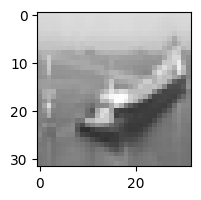

In [8]:

indexx=120
my_image1 = test_images[indexx]
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
plt.imshow(my_image1)
arr = np.array(test_labels[indexx]).item()
print(indexx)
label_for_index = get_label(indexx)
print(f" Image {indexx} is {test_labels[indexx]},{label_for_index}")


In [9]:
# Normalize data.
my_image  = my_image1 / 255.0 # Normalize pixel values to between 0 and 1
print(my_image)

[[[0.85490196 0.85490196 0.85490196]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  ...
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]
  [0.85098039 0.85098039 0.85098039]]

 [[0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.84313725 0.84313725 0.84313725]
  [0.84313725 0.84313725 0.84313725]
  [0.84705882 0.84705882 0.84705882]]

 [[0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.84313725 0.84313725 0.84313725]
  [0.83921569 0.83921569 0.83921569]]

 ...

 [[0.46666667 0.46666667 0.46666667]
  [0.4745098  0.4745098  0.4745098 ]
  [0.50196078 0.50196078 0.50196078]
  ...
  [0.4745098  0.4745098  0.4745098 ]
  [0.45882353 0.45882353 0.45882353]
  [0.45098039 0.45098039 0.45098039]]

 [[0.45490196 0.45490196 0.45490196]
  [0.47058824 0.47058824 0.47058824]


In [10]:
my_image.shape

(32, 32, 3)

In [11]:
my_image= np.expand_dims(my_image, axis=0)

In [12]:
# Extracting architecture details
archit = []

for layer in resnet50CBAM_model.layers:
    layer_type = layer.name
    archit.append((layer_type))

attention_maps_layer=[]
for att_map in archit:
    if att_map.split("_")[0] == "spartialMap" :
        attention_maps_layer.append(att_map)


feature_maps_layer=[]
for fea_map in archit:
    if fea_map.split("_")[0] == "refined" :
        feature_maps_layer.append(fea_map)


print(archit)
print(attention_maps_layer)
print(feature_maps_layer)

['input_1', 'conv2d', 'batch_normalization', 'activation', 'conv2d_1', 'batch_normalization_1', 'activation_1', 'conv2d_2', 'batch_normalization_2', 'global_average_pooling2d', 'global_max_pooling2d', 'reshape', 'reshape_1', 'dense', 'dense_1', 'add', 'activation_2', 'channelMap_1', 'lambda', 'lambda_1', 'concatenate', 'conv2d_3', 'spartialMap_1', 'add_1', 'refined_feature_map_1', 'conv2d_4', 'batch_normalization_3', 'activation_3', 'conv2d_5', 'batch_normalization_4', 'global_average_pooling2d_1', 'global_max_pooling2d_1', 'reshape_2', 'reshape_3', 'dense_2', 'dense_3', 'add_2', 'activation_4', 'channelMap_2', 'lambda_2', 'lambda_3', 'concatenate_1', 'conv2d_6', 'spartialMap_2', 'add_3', 'refined_feature_map_2', 'conv2d_7', 'batch_normalization_5', 'activation_5', 'conv2d_8', 'batch_normalization_6', 'global_average_pooling2d_2', 'global_max_pooling2d_2', 'reshape_4', 'reshape_5', 'dense_4', 'dense_5', 'add_4', 'activation_6', 'channelMap_3', 'lambda_4', 'lambda_5', 'concatenate_2', '

In [13]:
feature_maps_resnet20CBAM_list=[]
for feat_layer_name in feature_maps_layer:
    feature_maps_resnet20CBAM = Model(inputs=resnet50CBAM_model.input, outputs=resnet50CBAM_model.get_layer(feat_layer_name).output)
    feature_maps_resnet20CBAM_list.append(feature_maps_resnet20CBAM)

print(feature_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x0000019ED1C8CFD0>, <keras.src.engine.functional.Functional object at 0x0000019EC64D7E50>, <keras.src.engine.functional.Functional object at 0x0000019EC64C6410>, <keras.src.engine.functional.Functional object at 0x0000019EC64A7850>, <keras.src.engine.functional.Functional object at 0x0000019EC64AC990>, <keras.src.engine.functional.Functional object at 0x0000019EC6472A90>, <keras.src.engine.functional.Functional object at 0x0000019EC6485AD0>, <keras.src.engine.functional.Functional object at 0x0000019EC646EE50>, <keras.src.engine.functional.Functional object at 0x0000019EC6455ED0>, <keras.src.engine.functional.Functional object at 0x0000019EC63E95D0>, <keras.src.engine.functional.Functional object at 0x0000019EC6429A10>, <keras.src.engine.functional.Functional object at 0x0000019EC63FA4D0>, <keras.src.engine.functional.Functional object at 0x0000019EC63E4D10>, <keras.src.engine.functional.Functional object at 0x0000019EC63B5490>, <kera

In [14]:
feature_map=[]
for feature_maps_resnet20CBAM in feature_maps_resnet20CBAM_list:
    feature_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    feature_map.append(feature_mapofImage)


1/1 [==============================] - 6s 6s/step


In [15]:
attention_maps_resnet20CBAM_list=[]
for att_layer_name in attention_maps_layer:
    atteention_maps_resnet20CBAM = Model(inputs=resnet50CBAM_model.input, outputs=resnet50CBAM_model.get_layer(att_layer_name).output)
    attention_maps_resnet20CBAM_list.append(atteention_maps_resnet20CBAM)

print(attention_maps_resnet20CBAM_list)

[<keras.src.engine.functional.Functional object at 0x0000019EBE618310>, <keras.src.engine.functional.Functional object at 0x0000019EC58AF9D0>, <keras.src.engine.functional.Functional object at 0x0000019EFFDD0890>, <keras.src.engine.functional.Functional object at 0x0000019EFFEB99D0>, <keras.src.engine.functional.Functional object at 0x0000019EFFC6D710>, <keras.src.engine.functional.Functional object at 0x0000019EFFF2E510>, <keras.src.engine.functional.Functional object at 0x0000019EFFF55790>, <keras.src.engine.functional.Functional object at 0x0000019EBE62A8D0>, <keras.src.engine.functional.Functional object at 0x0000019EE87667D0>, <keras.src.engine.functional.Functional object at 0x0000019EFFF2E8D0>, <keras.src.engine.functional.Functional object at 0x0000019EFFFB7E50>, <keras.src.engine.functional.Functional object at 0x0000019E838A0450>, <keras.src.engine.functional.Functional object at 0x0000019EE2A75310>, <keras.src.engine.functional.Functional object at 0x0000019EFD0A61D0>, <kera

In [16]:
attention_map=[]
for feature_maps_resnet20CBAM in attention_maps_resnet20CBAM_list:
    attention_mapofImage = feature_maps_resnet20CBAM.predict(my_image)
    attention_map.append(attention_mapofImage)


1/1 [==============================] - 5s 5s/step


In [17]:
predict_resnet50CBAM_model= resnet50CBAM_model.predict(my_image)
print(predict_resnet50CBAM_model)

predicted_class=[]
for predict in predict_resnet50CBAM_model:
    pred=predict.tolist()
    # Get the index of the highest probability
    max_index = pred.index(max(pred))
    mapped_range = get_label(max_index)
    predicted_class.append(mapped_range)

print("predicated class: ",(predicted_class))

1/1 [==============================] - 5s 5s/step
[[4.6815418e-10 4.0423045e-10 1.3422010e-09 4.0654800e-09 1.6284796e-10
  5.7393426e-12 7.6097989e-10 1.0183509e-08 1.0000000e+00 3.1820321e-08]]
predicated class:  ['ship']


In [18]:
weighted_feature_maps = [feat_map * att_map for feat_map , att_map in zip(feature_map, attention_map)]

[[-8.11240482e+00  1.07037163e+01 -1.70659590e+00 -7.08900630e-01
  -6.18608952e-01 -7.69257367e-01 -9.43941474e-01 -1.11419559e+00
  -7.70059586e-01 -8.33724737e-01 -1.24488163e+00 -6.53046668e-01
  -4.72337008e-01 -4.14171040e-01  1.16956177e+01  2.43487053e+01]
 [-6.41908550e+00  2.63477635e+00  4.01623517e-01  6.11582637e-01
   4.42838967e-01  4.57977474e-01  5.08377016e-01  4.45233405e-01
   3.91349792e-01  3.25492710e-01  1.23356968e-01  6.55577719e-01
   7.21098959e-01  3.00220966e+00  9.64946747e+00  8.12122726e+00]
 [-6.71801424e+00  2.82825279e+00  4.18002903e-01 -3.90430808e-01
   9.12298262e-01  6.32155061e-01  1.16427332e-01  8.82425904e-02
  -1.94796100e-02  7.52537549e-02  2.90942430e-01  8.59028250e-02
  -7.67360210e-01  1.29802620e+00  3.95730639e+00  6.58360386e+00]
 [-5.32035017e+00  2.63231373e+00  1.19938099e+00 -3.12281847e-02
   1.94907737e+00  7.73007989e-01  6.38104677e-01  1.05173874e+00
   2.39006162e-01  6.02564692e-01 -5.46041355e-02 -3.93478632e-01
  -5.69

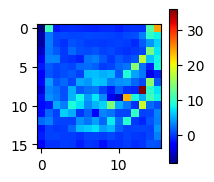

In [19]:
# Sum across channels to obtain the final heat map
heat_map = weighted_feature_maps[8].sum(axis=-1)
# Visualize the heat map
plt.figure(figsize=(2, 2))  # Adjust the figsize to reduce the size
print(heat_map[0])
plt.imshow(heat_map[0], cmap='jet')
plt.colorbar()
plt.show()


In [20]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
heat_map_list=[]
# Create a figure with a grid of subplots
for i in range(len(weighted_feature_maps)):
    # Sum across channels to obtain the final heat map
    heat_map_list.append(weighted_feature_maps[i].sum(axis=-1))
print(heat_map_list)



[array([[[-0.7227706 , -0.9118216 , -1.8408573 , ..., -2.8983154 ,
         -3.277094  ,  3.1328995 ],
        [-0.5733604 ,  2.9819427 ,  4.0273247 , ...,  6.145332  ,
          3.9351792 , -1.6008303 ],
        [ 1.4907212 , -1.1747862 , -1.8926785 , ..., -1.3599857 ,
         -1.1808676 , -1.7528139 ],
        ...,
        [ 1.8672607 ,  0.64179033,  0.48469913, ..., -0.14262   ,
         -0.01483418,  0.710205  ],
        [ 1.7523792 ,  1.145649  ,  0.76560956, ..., -0.00938031,
          0.12628643,  0.46126425],
        [ 1.329756  ,  0.37265927,  0.44286218, ..., -0.31936544,
         -0.79548615,  1.2670687 ]]], dtype=float32), array([[[ 5.628092  , -0.50939393, -5.414451  , ..., -5.094655  ,
         -1.8038869 ,  4.7767973 ],
        [ 7.601939  ,  2.1141882 ,  1.8437861 , ...,  3.9795415 ,
          0.16748549, -3.510847  ],
        [ 9.321006  ,  3.6903982 ,  0.74371487, ...,  2.4959083 ,
          3.8988607 , -5.990317  ],
        ...,
        [ 3.864099  ,  4.899296  ,  1

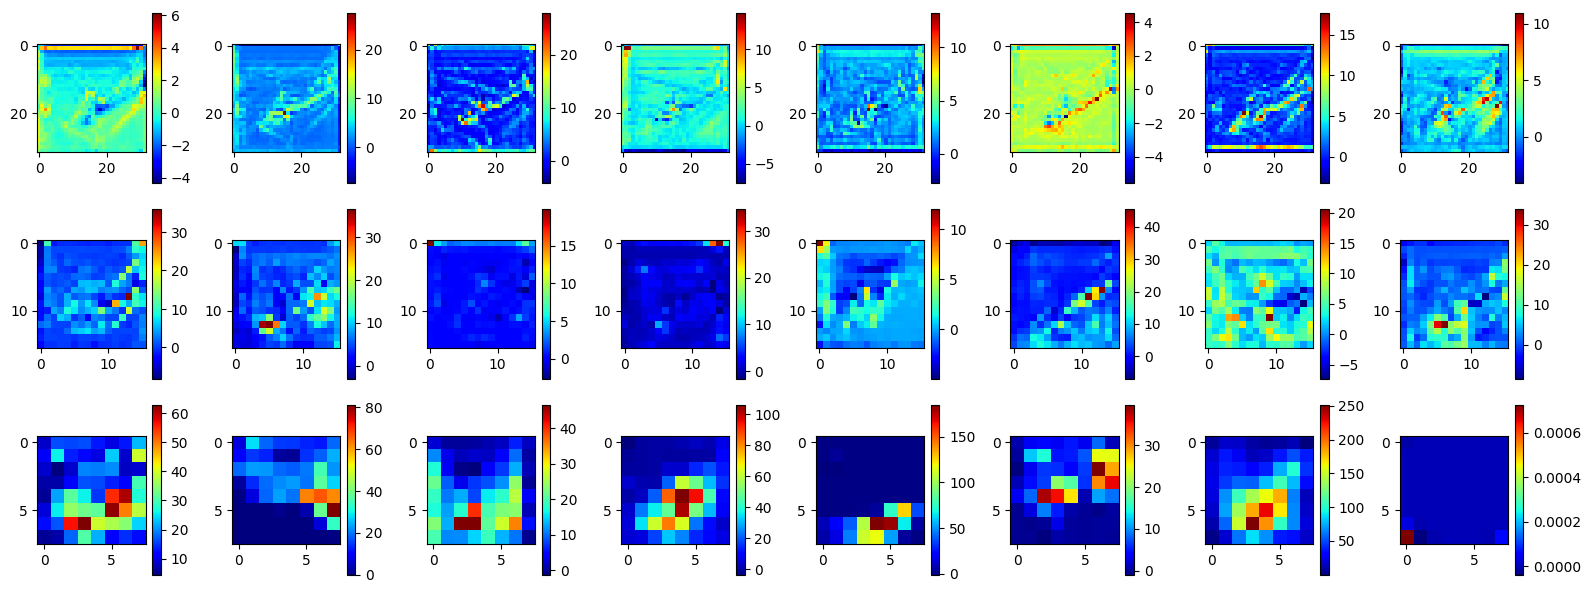

In [21]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)
# Number of subplots
num_subplots = len(heat_map_list)
num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    im = ax.imshow(heat_map_list[i][0], cmap='jet')
    fig.colorbar(im, ax=ax)

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

# Display all subplots
plt.tight_layout()
plt.show()


In [22]:
# Resize heatmap to match image size
my_image=np.squeeze(my_image, axis=0)
print(f"Image size: {my_image.shape}")
my_heat_map=np.squeeze(heat_map, axis=0)
print(f"Original attention_map size: {my_heat_map.shape}")


Image size: (32, 32, 3)
Original attention_map size: (16, 16)


In [23]:
normalize_resize_heat_map_list=[]
# Create a figure with a grid of subplots
for heat_map in heat_map_list:
    # Sum across channels to obtain the final heat map
    squeeze_heat_map=(np.squeeze(heat_map, axis=0))
    # Normalize the attention map to be in the range [0, 255]
    heat_map_normalize = np.uint8(255 * (squeeze_heat_map - np.min(squeeze_heat_map)) / (np.max(squeeze_heat_map) - np.min(squeeze_heat_map)))
    my_heat_map_normalize_stretch = cv2.resize(heat_map_normalize, (32, 32), interpolation = cv2.INTER_LINEAR)
    apply_colour_heatmap = cv2.applyColorMap(my_heat_map_normalize_stretch, cv2.COLORMAP_JET)
    heat_map_ = cv2.cvtColor(apply_colour_heatmap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    normalize_resize_heat_map_list.append(heat_map_)
    
print("heat map after normalize_resize:", normalize_resize_heat_map_list)
print(f"Resized attention_map size: {my_heat_map_normalize_stretch.shape}")



heat map after normalize_resize: [array([[[  0, 220, 255],
        [  0, 200, 255],
        [  0, 112, 255],
        ...,
        [  0,   8, 255],
        [  0,   0, 228],
        [255, 168,   0]],

       [[  0, 236, 255],
        [255, 184,   0],
        [255,  80,   0],
        ...,
        [128,   0,   0],
        [255,  88,   0],
        [  0, 132, 255]],

       [[182, 255,  74],
        [  0, 176, 255],
        [  0, 104, 255],
        ...,
        [  0, 156, 255],
        [  0, 176, 255],
        [  0, 120, 255]],

       ...,

       [[218, 255,  38],
        [ 98, 255, 158],
        [ 82, 255, 174],
        ...,
        [ 22, 255, 234],
        [ 34, 255, 222],
        [106, 255, 150]],

       [[206, 255,  50],
        [150, 255, 106],
        [110, 255, 146],
        ...,
        [ 34, 255, 222],
        [ 50, 255, 206],
        [ 82, 255, 174]],

       [[166, 255,  90],
        [ 74, 255, 182],
        [ 78, 255, 178],
        ...,
        [  6, 255, 250],
        [  0, 2

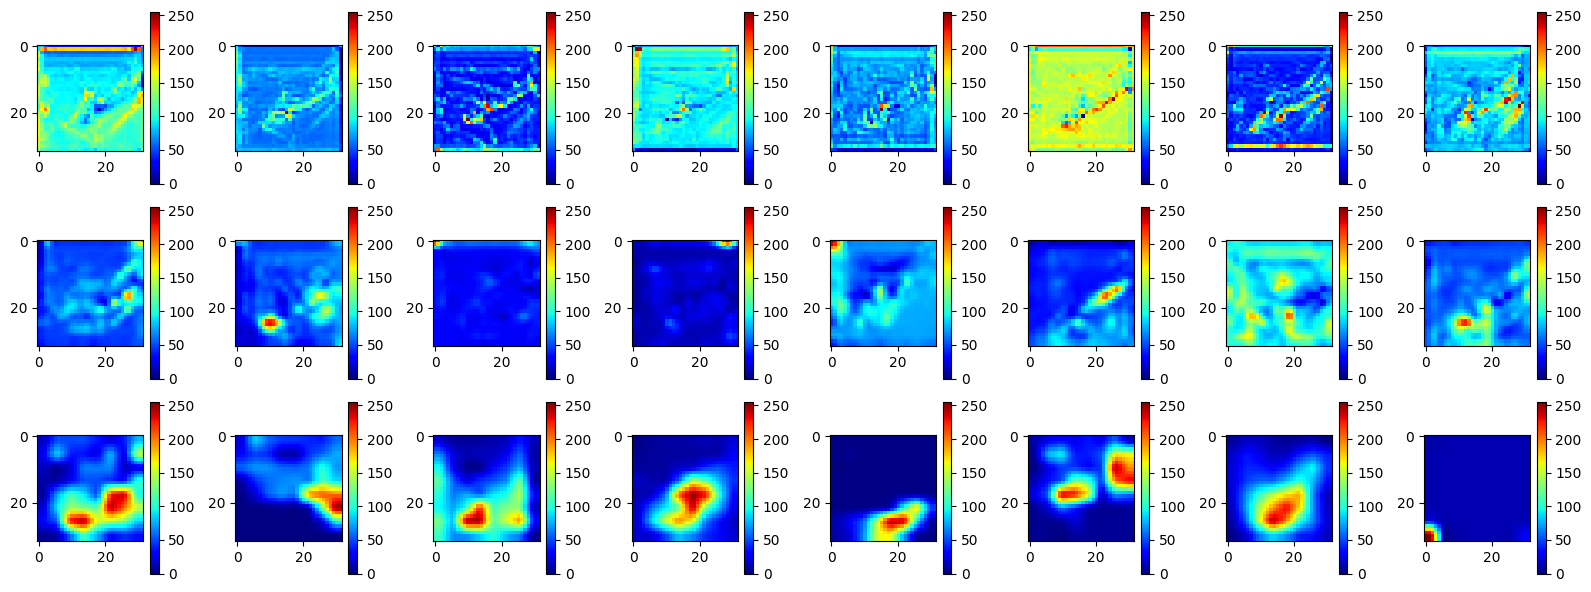

In [24]:
# Assuming weighted_feature_maps is a list or array of feature maps
# Example shape of weighted_feature_maps: (num_maps, height, width, num_channels)

# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)

num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
# Create a figure with a grid of subplots
for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
        
    im = ax.imshow(normalize_resize_heat_map_list[i], cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

    
# Display all subplots
plt.tight_layout()
plt.show()


In [25]:
my_image= np.array(my_image)
normalize_resize_heat_map_list= np.array(normalize_resize_heat_map_list)


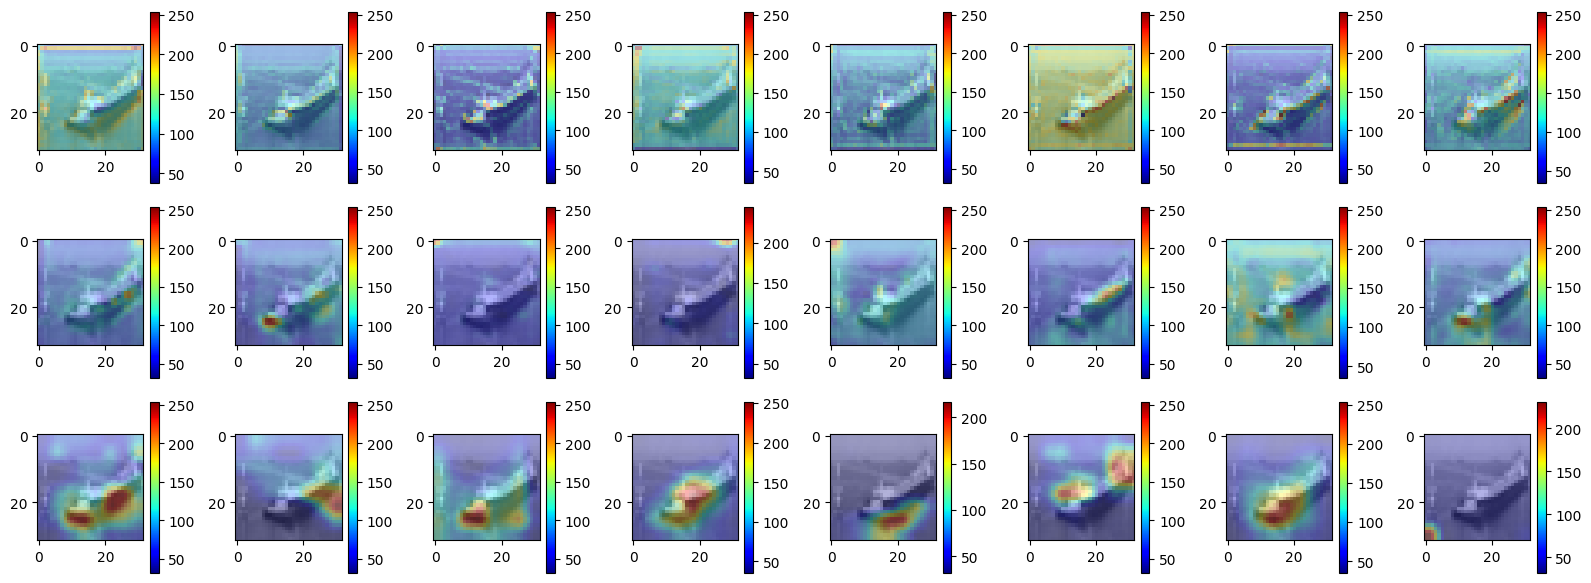

In [26]:
# Blend the images with specified weights
alpha = 0.7  # Weight of the first image
beta = 1.0 - alpha  # Transparency factor for the heatmap # Weight of the second image
gamma = 0    # Scalar added to each sum
# Assuming weighted_feature_maps is a list or array of feature maps
# Number of subplots
num_subplots = len(normalize_resize_heat_map_list)
# Create a figure with a grid of subplots
# Calculate the number of columns needed to fit all subplots in 3 rows
num_rows = 3
num_cols = (num_subplots + num_rows - 1) // num_rows

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

for i in range(num_subplots):
    # Sum across channels to obtain the final heat map
    # Visualize the heat map in the subplot
    # Find the correct subplot location
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    blended_image = cv2.addWeighted(my_image1, alpha, normalize_resize_heat_map_list[i], beta, gamma)
    im = ax.imshow(blended_image, cmap='jet')
    fig.colorbar(im, ax=ax)
# Display all subplots

# Turn off any unused subplots
for j in range(num_subplots, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [27]:
kkk

NameError: name 'kkk' is not defined